# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 259 (delta 2), reused 5 (delta 1), pack-reused 252
Receiving objects: 100% (259/259), 41.18 MiB | 14.01 MiB/s, done.
Resolving deltas: 100% (125/125), done.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

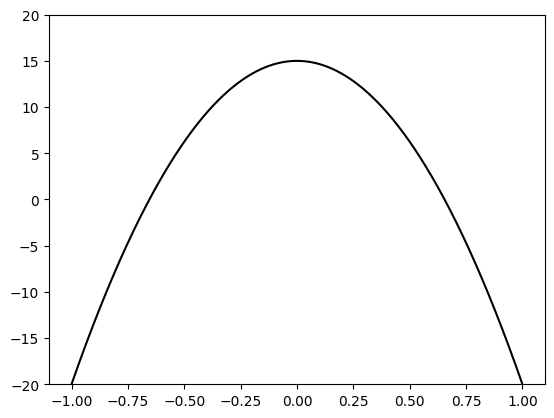

In [3]:
# Our original polynomial is -35x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [4]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

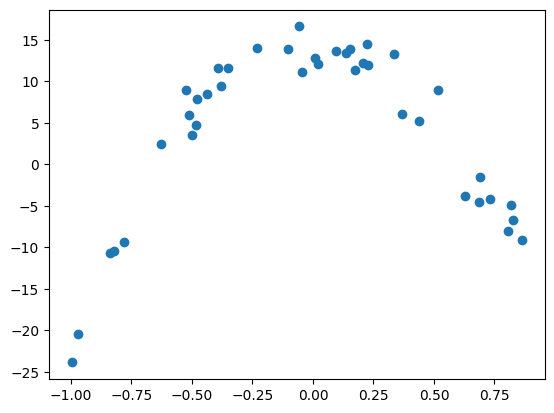

In [5]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [6]:
for datasample in zip(X,Y):
    print(datasample)

(0.6888437030500962, -1.503313676546703)
(-0.4821664994140733, 4.776223391096098)
(0.02254944273721704, 12.087957039273702)
(-0.3933745478421451, 11.552655381342872)
(-0.04680609169528838, 11.13939451533042)
(0.009373711634780513, 12.810729063756577)
(-0.43632431120059234, 8.437955069843738)
(-0.4989873172751189, 3.511211911084044)
(0.8194925119364802, -4.879955934160179)
(0.8043319008791654, -8.0368585173616)
(-0.37970486136133474, 9.412786903432224)
(0.36796786383088254, 6.014161594638752)
(-0.055714569094573285, 16.612588226930765)
(0.2217739468876032, 14.540743210654112)
(0.8260221064757964, -6.653701461777612)
(0.7306198555432801, -4.157483878852887)
(-0.47901537921608117, 7.82406268607659)
(-0.9719165996719621, -20.435354443047032)
(0.43940937280790826, 5.238271435416371)
(0.3363064024637017, 13.258006206843095)
(-0.9977143613711434, -23.858802994572372)
(-0.512178246225736, 5.980815567451724)
(-0.3495912745052199, 11.6168873009973)
(0.13502148124134372, 13.415138003037914)
(-0.5

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [15]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(200, include_bias=False)
    X = poly.fit_transform(X.reshape(-1, 1))
    return X
X_poly=addPoly(X,200)

In [16]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[6.88843703e-01 4.74505647e-01 3.26860227e-01 2.25155609e-01
 1.55097024e-01 1.06837608e-01 7.35944136e-02 5.06950484e-02
 3.49209649e-02 2.40550867e-02 1.65701950e-02 1.14142745e-02
 7.86265112e-03 5.41613771e-03 3.73087236e-03 2.56998793e-03
 1.77032000e-03 1.21947379e-03 8.40026839e-04 5.78647198e-04
 3.98597479e-04 2.74571363e-04 1.89136755e-04 1.30285662e-04
 8.97464582e-05 6.18212826e-05 4.25852012e-05 2.93345477e-05
 2.02069185e-05 1.39194085e-05 9.58829693e-06 6.60483796e-06
 4.54970104e-06 3.13403291e-06 2.15885884e-06 1.48711632e-06
 1.02439071e-06 7.05645090e-07 4.86079177e-07 3.34832580e-07
 2.30647314e-07 1.58879950e-07 1.09443453e-07 7.53894335e-08
 5.19315366e-08 3.57727120e-08 2.46418074e-08 1.69743538e-08
 1.16926768e-08 8.05442676e-09 5.54824115e-09 3.82187098e-09
 2.63267176e-09 1.81349936e-09 1.24921762e-09 8.60515689e-10
 5.92760814e-10 4.08319554e-10 2.81268354e-10 1.93749934e-10
 1.33463422e-10 9.19354380e-11 6.33291475e-11 4.36238845e-11
 3.00500381e-1

## Splitting data into training and testing

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X_poly, Y, test_size=0.2, random_state=100)

In [19]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [24]:
from sklearn.linear_model import LinearRegression

model_no_reg = LinearRegression()
model_no_reg.fit(X_train, y_train)

LinearRegression()

Training error (rmse): 0.3542221711635661
Testing error (rmse): 22177993844572.43


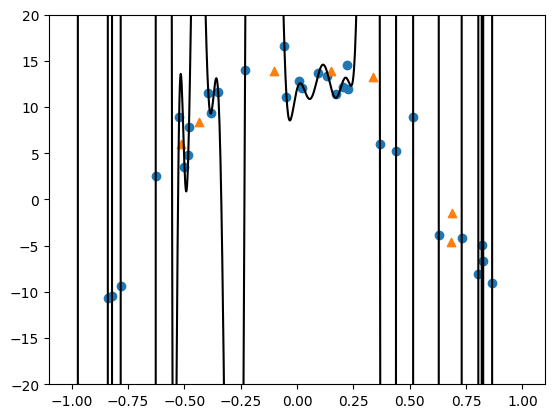

Polynomial coefficients
[11.922589761311302, 91.25400379158177, -2955.0714986469548, -32945.24555947068, 1342424.597113354, -5243285.439751328, -71594002.25068551, 395608389.99071926, 1728563246.4192069, -10818817919.7314, -25142491893.09955, 157275751405.56827, 247861089540.24588, -1354733630005.513, -1686407159943.166, 7145224872501.499, 7574613039272.465, -22779981390211.324, -20592935206682.29, 40573024666474.14, 27975612307551.016, -29377556162274.566, -4738041459017.61, -12570668621106.346, -22956907458821.29, 18592760581615.055, -1986485272701.571, 14863257140019.924, 17927805141543.8, -3117459268367.706, 16463567419366.375, -12758821828580.871, 2047862798290.7456, -10638296196964.81, -11021998462327.959, -3080174743383.4805, -15705685418597.082, 4015445264330.9575, -12474529197924.541, 7838406343528.8125, -5232744244728.463, 8345976993422.412, 2323133117286.777, 6498366463173.74, 7907590717918.7295, 3516794963848.1694, 10758120784044.848, 298296501211.1003, 11088334611513.82, -

In [25]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [26]:
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge

model_L1_reg = Lasso(alpha=0.1)
model_L1_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

Training error (rmse): 2.1671631372320075
Testing error (rmse): 2.126980740533005


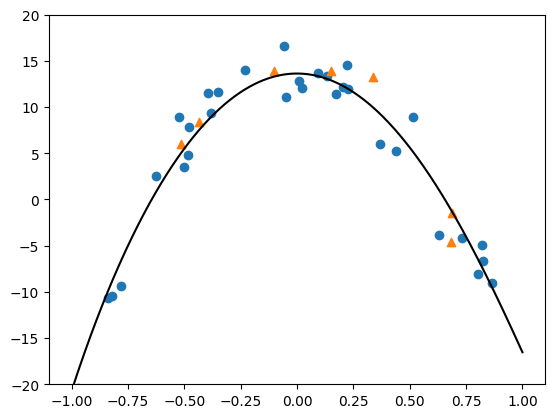

Polynomial coefficients
[13.630344516014498, -0.0, -32.26493322963533, 0.0, -0.0, 2.1034697401228475, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0

In [27]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [28]:
from sklearn import linear_model

model_L2_reg = Ridge()
model_L2_reg.fit(X_train, y_train)

Ridge()

Training error (rmse): 2.9862317230201976
Testing error (rmse): 3.446151044926254


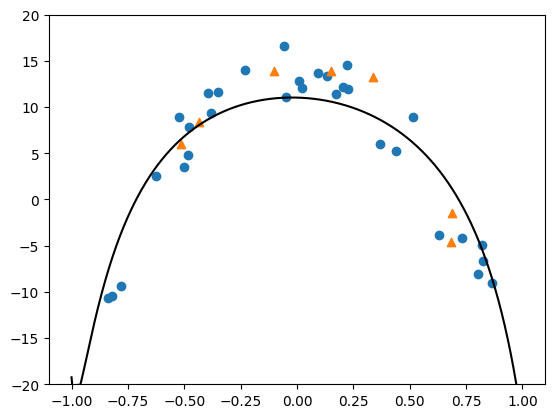

Polynomial coefficients
[11.026337969557446, -0.647624077528387, -14.874868356350115, 0.7738419859452874, -9.089125797205726, 0.9330904972812114, -5.44815726737086, 0.7078953249482598, -3.2923111573103396, 0.44565180235223434, -1.9854986532791337, 0.22840410427822655, -1.176174113487563, 0.06805092601176371, -0.6675880369575049, -0.04293452754237234, -0.3452907257928979, -0.11607229968576599, -0.14049566297653773, -0.16189978313115766, -0.010802746077662989, -0.18870712825015878, 0.07043157316123833, -0.2025822593960023, 0.12019692908439789, -0.20783296706450144, 0.14944941549500695, -0.20744122324150616, 0.16531599721703172, -0.20344234602187072, 0.17246432378580628, -0.1972116607843174, 0.17396749193125155, -0.1896708741550102, 0.17185677494003807, -0.18143269036062318, 0.16747841777872044, -0.17290056553237115, 0.16172581997709917, -0.16433686482279625, 0.15519165372496047, -0.15590915812418385, 0.14826810799684345, -0.14772155036644635, 0.14121328673632647, -0.13983583279142087, 0.

In [29]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [30]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,0.336306,13.258006,2.598861e+02,9.990165,9.035251
1,-0.436324,8.437955,4.848289e+01,7.454517,8.023697
2,-0.997714,-23.858803,-6.272884e+13,-20.566806,-19.892622
3,0.688844,-1.503314,1.791556e+06,-1.353307,1.129751
4,0.151302,13.873855,1.209000e+01,12.891893,10.585757
5,-0.104061,13.890626,1.194158e+02,13.280933,10.930699
6,0.684920,-4.588770,1.712526e+06,-1.188596,1.278260
7,-0.512178,5.980816,1.282881e+01,5.092258,6.568999
